In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("Desktop/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df2=df.replace(to_replace=['Male','Female'],value=[0,1])

In [5]:
df2

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [6]:
x=df2[['Age','EstimatedSalary','Gender']]

In [7]:
x.head(5)

,Age,EstimatedSalary,Gender
0,19,19000,0
1,35,20000,0
2,26,43000,1
3,27,57000,1
4,19,76000,0


In [8]:
y=df2['Purchased']

In [9]:
y.tail(5)

395    1
396    1
397    1
398    0
399    1
Name: Purchased, dtype: int64

In [10]:
print(x.shape)
print(y.shape)

(400, 3)
(400,)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.25)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((300, 3), (100, 3), (300,), (100,))

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
ss=MinMaxScaler()

In [16]:
ss.fit(x_train)

MinMaxScaler()

In [17]:
x_train_scaled=ss.transform(x_train)
x_train_scaled

array([[0.23809524, 0.47407407, 0.        ],
       [0.23809524, 0.51851852, 1.        ],
       [0.54761905, 0.42222222, 1.        ],
       [1.        , 0.14074074, 0.        ],
       [0.66666667, 0.4962963 , 1.        ],
       [0.69047619, 0.14074074, 0.        ],
       [0.35714286, 0.4       , 1.        ],
       [0.19047619, 0.        , 0.        ],
       [0.42857143, 0.95555556, 0.        ],
       [0.4047619 , 0.17037037, 0.        ],
       [0.30952381, 0.02222222, 0.        ],
       [0.80952381, 0.73333333, 1.        ],
       [0.38095238, 0.20740741, 0.        ],
       [0.16666667, 0.48148148, 0.        ],
       [0.83333333, 0.42222222, 0.        ],
       [0.64285714, 0.08148148, 0.        ],
       [0.45238095, 0.28148148, 0.        ],
       [1.        , 0.64444444, 0.        ],
       [0.33333333, 0.75555556, 1.        ],
       [0.57142857, 0.48148148, 0.        ],
       [0.73809524, 0.15555556, 1.        ],
       [0.69047619, 0.03703704, 0.        ],
       [0.

In [17]:
x_test_scaled=ss.transform(x_test)
x_test_scaled

array([[0.57142857, 0.37037037, 0.        ],
       [0.45238095, 0.41481481, 1.        ],
       [0.57142857, 0.55555556, 1.        ],
       [0.69047619, 0.23703704, 1.        ],
       [0.11904762, 0.24444444, 1.        ],
       [0.95238095, 0.05925926, 1.        ],
       [0.5       , 0.2       , 0.        ],
       [0.69047619, 0.20740741, 0.        ],
       [0.4047619 , 0.32592593, 0.        ],
       [0.5       , 0.41481481, 1.        ],
       [0.54761905, 0.32592593, 0.        ],
       [0.19047619, 0.76296296, 1.        ],
       [0.97619048, 0.85185185, 0.        ],
       [0.92857143, 0.08148148, 1.        ],
       [0.66666667, 0.05925926, 0.        ],
       [0.47619048, 0.41481481, 0.        ],
       [0.23809524, 0.53333333, 1.        ],
       [0.14285714, 0.31851852, 0.        ],
       [0.28571429, 0.        , 0.        ],
       [0.5       , 0.79259259, 0.        ],
       [0.21428571, 0.28888889, 1.        ],
       [0.07142857, 0.42222222, 0.        ],
       [0.

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
dt_model=DecisionTreeClassifier()

In [21]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
#checking the train score
dt_model.score(x_train,y_train)

0.9966666666666667

In [23]:
#checking the validation score
dt_model.score(x_test,y_test)

0.9

In [24]:
#predictions on validation set
dt_model.predict(x_test)

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [25]:
#to increase accuracy
train_accuracy=[]
validation_accuracy=[]
for depth in range(1,5):
    dt_model=DecisionTreeClassifier(max_depth=depth)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    validation_accuracy.append(dt_model.score(x_test,y_test))

In [26]:
frame=pd.DataFrame({'max_depth':range(1,5),'train_accuracy':train_accuracy,'valid_acc':validation_accuracy})
frame

,max_depth,train_accuracy,valid_acc
0,1,0.833333,0.86
1,2,0.913333,0.92
2,3,0.913333,0.91
3,4,0.926667,0.91


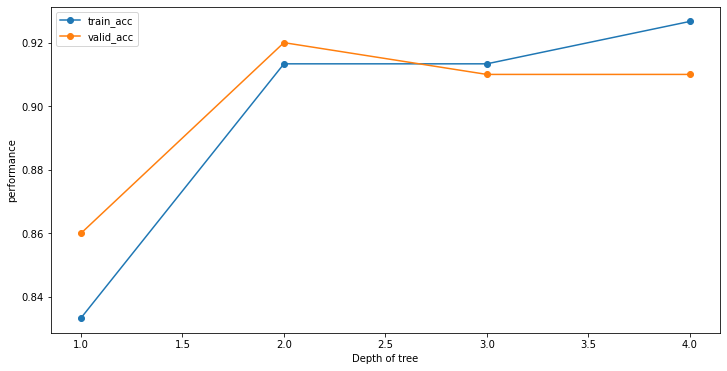

In [27]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_accuracy'],marker='o',label='train_acc')
plt.plot(frame['max_depth'],frame['valid_acc'],marker='o',label='valid_acc')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()
plt.show()

In [28]:
dt_model=DecisionTreeClassifier(max_depth=2)
dt_model

DecisionTreeClassifier(max_depth=2)

In [29]:
#fitting model
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [30]:
#validiaton score
dt_model.score(x_test,y_test)

0.92

In [31]:
from sklearn import tree

In [32]:
pip install graphviz

In [33]:
decision_tree=tree.export_graphviz(dt_model,out_file='tree2.dot',feature_names=x_train.columns,max_depth=2,filled=True)

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
new_input=[[21,95000,1]]
new_output=dt_model.predict(new_input)
print(new_output)

[1]
